In [1]:
import numpy as np
import pandas as pd
import scipy  as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%precision 3
%matplotlib inline

In [5]:
np.pi

3.142

In [4]:
np.exp(1)

2.718281828459045

In [8]:
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt( 2 * np.pi * sigma **2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

0.22831135673627742

In [9]:
stats.norm.pdf (loc = 4, scale=0.8, x = 3)

0.2283113567362774

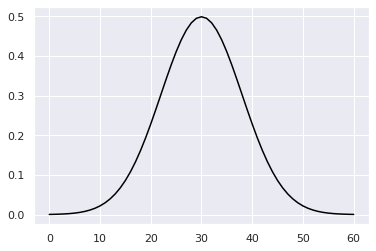

In [10]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(stats.norm.pdf(x=x_plot, loc=4, scale = 0.8),
        color= 'black')